In [64]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from nolearn.dbn import DBN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
%matplotlib inline

In [65]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
trainOrig = train
test = pd.read_csv('test.csv',header = 0)
testOrig = test
labels = train['label']
labelsOrig = labels
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [66]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

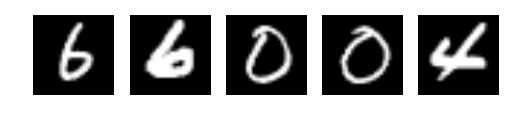

Labels: [6, 6, 0, 0, 4]


In [67]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [68]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [69]:
#Finding number of principal components
#Retaining 85% of total variance 
TotVar = 0 
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var 
    if(TotVar>=0.85): 
        break 
print('Total Retained Variance: {}'.format(TotVar)) 
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.850864180465
Number of principal components 58


In [70]:
#Again fitting pca for 42 principal components
pcaRed = PCA(n_components = 58,whiten= True)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.transform(train)
test = pcaRed.transform(test)

In [71]:
#Cross-validation split
(trainX, validX, trainY, validY) = train_test_split(train,labels, test_size = 0.2)

In [72]:
#Classifier and fitting
dbn = DBN([trainX.shape[1], 1500, 10],learn_rates = 0.2,learn_rate_decays = 0.9,epochs = 50,verbose = 1)
dbn.fit(trainX,trainY)

[DBN] fitting X.shape=(33600L, 58L)
[DBN] layers [58L, 1500, 10]


[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.358489482385
  err  0.0836607142857
  (0:00:11)


100%


Epoch 2:
  loss 0.267013341114
  err  0.0479761904762
  (0:00:13)


100%


Epoch 3:
  loss 0.176890140557
  err  0.0322023809524
  (0:00:13)


100%


Epoch 4:
  loss 0.0779415513713
  err  0.018869047619
  (0:00:11)


100%


Epoch 5:
  loss 0.0417788216003
  err  0.0105952380952
  (0:00:11)


100%


Epoch 6:
  loss 0.0151189452505
  err  0.00428571428571
  (0:00:05)


100%


Epoch 7:
  loss 0.00748631317338
  err  0.001875
  (0:00:05)


100%


Epoch 8:
  loss 0.0045042841359
  err  0.000565476190476
  (0:00:05)


100%


Epoch 9:
  loss 0.0032131588031
  err  0.000208333333333
  (0:00:09)


100%


Epoch 10:
  loss 0.00314082684949
  err  0.00014880952381
  (0:00:12)


100%


Epoch 11:
  loss 0.00335271265757
  err  5.95238095238e-05
  (0:00:12)


100%


Epoch 12:
  loss 0.00341672753267
  err  0.0
  (0:00:07)


100%


Epoch 13:
  loss 0.00352399828012
  err  2.97619047619e-05
  (0:00:06)


100%


Epoch 14:
  loss 0.00372090351524
  err  0.0
  (0:00:09)


100%


Epoch 15:
  loss 0.00386015189789
  err  0.0
  (0:00:13)


100%


Epoch 16:
  loss 0.00392846432337
  err  0.0
  (0:00:13)


100%


Epoch 17:
  loss 0.00412360250307
  err  0.0
  (0:00:12)


100%


Epoch 18:
  loss 0.00412444740844
  err  0.0
  (0:00:12)


100%


Epoch 19:
  loss 0.00412458028844
  err  0.0
  (0:00:08)


100%


Epoch 20:
  loss 0.00426424843791
  err  0.0
  (0:00:07)


100%


Epoch 21:
  loss 0.00423829688269
  err  2.97619047619e-05
  (0:00:08)


100%


Epoch 22:
  loss 0.00420408362356
  err  0.0
  (0:00:12)


100%


Epoch 23:
  loss 0.00429058542409
  err  0.0
  (0:00:12)


100%


Epoch 24:
  loss 0.00441709271089
  err  0.0
  (0:00:10)


100%


Epoch 25:
  loss 0.00431246505673
  err  0.0
  (0:00:10)


100%


Epoch 26:
  loss 0.00448521976204
  err  0.0
  (0:00:12)


100%


Epoch 27:
  loss 0.00435326032063
  err  0.0
  (0:00:11)


100%


Epoch 28:
  loss 0.00438635628382
  err  0.0
  (0:00:12)


100%


Epoch 29:
  loss 0.004513122925
  err  0.0
  (0:00:11)


100%


Epoch 30:
  loss 0.004378594096
  err  0.0
  (0:00:09)


100%


Epoch 31:
  loss 0.00450435260887
  err  0.0
  (0:00:12)


100%


Epoch 32:
  loss 0.00439852514958
  err  0.0
  (0:00:11)


100%


Epoch 33:
  loss 0.00450847928013
  err  0.0
  (0:00:12)


100%


Epoch 34:
  loss 0.00459199755807
  err  0.0
  (0:00:13)


100%


Epoch 35:
  loss 0.00456482445267
  err  0.0
  (0:00:12)


100%


Epoch 36:
  loss 0.00448642374183
  err  0.0
  (0:00:12)


100%


Epoch 37:
  loss 0.00456472358179
  err  0.0
  (0:00:13)


100%


Epoch 38:
  loss 0.00437318488889
  err  0.0
  (0:00:11)


100%


Epoch 39:
  loss 0.00452271188343
  err  0.0
  (0:00:12)


100%


Epoch 40:
  loss 0.00426238857609
  err  0.0
  (0:00:12)


100%


Epoch 41:
  loss 0.00465364127908
  err  0.0
  (0:00:12)


100%


Epoch 42:
  loss 0.0045668098856
  err  0.0
  (0:00:12)


100%


Epoch 43:
  loss 0.00457213690482
  err  0.0
  (0:00:12)


100%


Epoch 44:
  loss 0.00461744325102
  err  0.0
  (0:00:11)


100%


Epoch 45:
  loss 0.0045830632509
  err  0.0
  (0:00:08)


100%


Epoch 46:
  loss 0.00475155232585
  err  0.0
  (0:00:10)


100%


Epoch 47:
  loss 0.00458442654882
  err  0.0
  (0:00:07)


100%


Epoch 48:
  loss 0.00464099989716
  err  0.0
  (0:00:07)


100%


Epoch 49:
  loss 0.00444395454223
  err  0.0
  (0:00:07)


100%


Epoch 50:
  loss 0.00462498768011
  err  0.0
  (0:00:07)


In [73]:
#cross validation report
predsValid = dbn.predict(validX)
predsTrain = dbn.predict(trainX)
print (classification_report(validY, predsValid))
print('The training accuracy is:', accuracy_score(trainY, predsTrain))
print ('The cross-validation accuracy is:', accuracy_score(validY, predsValid))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       816
          1       0.99      0.99      0.99       924
          2       0.98      0.98      0.98       840
          3       0.98      0.97      0.98       896
          4       0.98      0.99      0.99       807
          5       0.97      0.97      0.97       775
          6       0.99      0.99      0.99       810
          7       0.97      0.98      0.98       877
          8       0.97      0.98      0.97       792
          9       0.98      0.97      0.98       863

avg / total       0.98      0.98      0.98      8400

('The training accuracy is:', 1.0)
('The cross-validation accuracy is:', 0.98083333333333333)


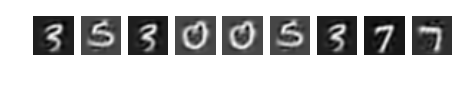

Predicted Labels: [3, 5, 3, 0, 0, 5, 3, 7, 7]
Original Labels: [3, 5, 3, 0, 0, 5, 3, 7, 7]


In [75]:
#Visualization of few random hand written digits from cross validation set
fig = plt.figure()
LabelsPred = []
LabelsOrig = []
for i in range(1,10):
    k = random.randrange(0,validX.shape[1],10)
    ax = fig.add_subplot(1,10,i)
    ax.imshow(pcaRed.inverse_transform(validX[k,:]).reshape(28,28),'gray')
    ax.axis('off')
    LabelsPred.append(predsValid[k])
    LabelsOrig.append(validY[k])
plt.show()
print('Predicted Labels: {}'.format(LabelsPred))
print('Original Labels: {}'.format(LabelsOrig))

In [76]:
#using classifier to predict test images on public leader board
#Training classifier on whole set of images
dbn.fit(train,labels)
pred = dbn.predict(test)
dfPred = pd.read_csv('sample_submission.csv',header=0)
dfPred['Label']= pd.DataFrame(pred)
dfPred.to_csv('mySubmission.csv', index=False)
#98.186% LeaderBoard Accuracy

[DBN] fitting X.shape=(42000L, 58L)
[DBN] layers [58L, 1500, 10]


[DBN] Fine-tune...


100%


Epoch 1:
  loss 0.364469768546
  err  0.0803401295732
  (0:00:15)


100%


Epoch 2:
  loss 0.285924472283
  err  0.0475419207317
  (0:00:15)


100%


Epoch 3:
  loss 0.158772678533
  err  0.0289872332317
  (0:00:15)


100%


Epoch 4:
  loss 0.0786618196852
  err  0.0177448551829
  (0:00:15)


100%


Epoch 5:
  loss 0.0306579633993
  err  0.00864615091463
  (0:00:15)


100%


Epoch 6:
  loss 0.0135943938812
  err  0.00354897103659
  (0:00:15)


100%


Epoch 7:
  loss 0.00623756084164
  err  0.00133384146341
  (0:00:15)


100%


Epoch 8:
  loss 0.0045065656587
  err  0.000262004573171
  (0:00:14)


100%


Epoch 9:
  loss 0.00428765364782
  err  0.000142911585366
  (0:00:14)


100%


Epoch 10:
  loss 0.00429412741017
  err  7.14557926829e-05
  (0:00:15)


100%


Epoch 11:
  loss 0.00473054679304
  err  9.52743902439e-05
  (0:00:15)


100%


Epoch 12:
  loss 0.00465467717927
  err  0.0
  (0:00:15)


100%


Epoch 13:
  loss 0.00487523800807
  err  2.3818597561e-05
  (0:00:15)


100%


Epoch 14:
  loss 0.00497692799382
  err  4.7637195122e-05
  (0:00:13)


100%


Epoch 15:
  loss 0.00507497095372
  err  0.0
  (0:00:15)


100%


Epoch 16:
  loss 0.00514484373228
  err  2.3818597561e-05
  (0:00:15)


100%


Epoch 17:
  loss 0.00513121333039
  err  2.3818597561e-05
  (0:00:15)


100%


Epoch 18:
  loss 0.00525310825851
  err  2.3818597561e-05
  (0:00:13)


100%


Epoch 19:
  loss 0.00530884651983
  err  2.3818597561e-05
  (0:00:15)


100%


Epoch 20:
  loss 0.00516203868543
  err  2.3818597561e-05
  (0:00:15)


100%


Epoch 21:
  loss 0.00524453436943
  err  0.0
  (0:00:15)


100%


Epoch 22:
  loss 0.00532373944997
  err  2.3818597561e-05
  (0:00:15)


100%


Epoch 23:
  loss 0.0054320116604
  err  0.0
  (0:00:15)


100%


Epoch 24:
  loss 0.00527925535408
  err  0.0
  (0:00:14)


100%


Epoch 25:
  loss 0.00540278073618
  err  0.0
  (0:00:15)


100%


Epoch 26:
  loss 0.00529393721933
  err  0.0
  (0:00:16)


100%


Epoch 27:
  loss 0.00531920114408
  err  0.0
  (0:00:16)


100%


Epoch 28:
  loss 0.00530102736389
  err  0.0
  (0:00:13)


100%


Epoch 29:
  loss 0.00527439050844
  err  0.0
  (0:00:15)


100%


Epoch 30:
  loss 0.00540842368674
  err  0.0
  (0:00:15)


100%


Epoch 31:
  loss 0.00536952151494
  err  0.0
  (0:00:15)


100%


Epoch 32:
  loss 0.00528765346968
  err  0.0
  (0:00:16)


100%


Epoch 33:
  loss 0.00531995689824
  err  0.0
  (0:00:10)


100%


Epoch 34:
  loss 0.00551909441031
  err  0.0
  (0:00:15)


100%


Epoch 35:
  loss 0.00525170458937
  err  0.0
  (0:00:14)


100%


Epoch 36:
  loss 0.00526673144628
  err  0.0
  (0:00:16)


100%


Epoch 37:
  loss 0.00553995067511
  err  0.0
  (0:00:15)


100%


Epoch 38:
  loss 0.00536809425262
  err  0.0
  (0:00:15)


100%


Epoch 39:
  loss 0.00545928344626
  err  0.0
  (0:00:11)


100%


Epoch 40:
  loss 0.00537977536318
  err  0.0
  (0:00:13)


100%


Epoch 41:
  loss 0.00522787996377
  err  0.0
  (0:00:10)


100%


Epoch 42:
  loss 0.00532980512355
  err  0.0
  (0:00:14)


100%


Epoch 43:
  loss 0.00531825150996
  err  0.0
  (0:00:13)


100%


Epoch 44:
  loss 0.00538474222057
  err  0.0
  (0:00:16)


100%


Epoch 45:
  loss 0.00545127571915
  err  0.0
  (0:00:13)


100%


Epoch 46:
  loss 0.00554278475164
  err  0.0
  (0:00:14)


100%


Epoch 47:
  loss 0.00535935868751
  err  0.0
  (0:00:16)


100%


Epoch 48:
  loss 0.00531361504803
  err  0.0
  (0:00:16)


100%


Epoch 49:
  loss 0.00530838310007
  err  0.0
  (0:00:14)


100%


Epoch 50:
  loss 0.00536594120475
  err  0.0
  (0:00:09)
